In [15]:
#Asignacion de algoritmos
import random

mi_semilla_asignada = 20
random.seed(mi_semilla_asignada)
algoritmos = ['Perceptron','KNN','Regresion Logistica','SVM Kernel lineal','Random Forest','SVM Kernel no lineal','Arbol de Decision']
asignados = random.sample(algoritmos,k=3)
print("Mis algoritmos asignados son: \t",asignados)

Mis algoritmos asignados son: 	 ['SVM Kernel no lineal', 'Arbol de Decision', 'KNN']


## Pregunta 1
Preparar los datos para ajustar modelos de clasificacion. Para esto:

1.1 Leer la base de datos y almacenarla como un objeto DataFrame de Pandas. Mostrar estadisticas descriptivas de los datos y generar un grafico de tortas que muestre el porcentaje del total de datos que pertenece a cada clase y la cantidad de datos en las clases.


               col1          col2          col3          col4          col5  \
count  1.221900e+04  1.221900e+04  1.221900e+04  1.221900e+04  1.221900e+04   
mean  -6.307531e-13  1.913738e-15  4.943677e-15 -2.175997e-15 -1.591583e-15   
std    1.771044e+03  4.060168e+01  3.033986e+01  2.079600e+01  1.463176e+01   
min   -3.215002e+03 -8.234705e+01 -7.663188e+01 -6.366942e+01 -4.460410e+01   
25%   -1.527250e+03 -3.345794e+01 -2.741397e+01 -1.507583e+01 -1.061320e+01   
50%   -5.797416e-03 -5.368655e+00 -3.451920e-01 -3.376398e+00 -1.629645e+00   
75%    1.527240e+03  2.877879e+01  2.009263e+01  1.386965e+01  8.686272e+00   
max    3.215007e+03  2.204068e+02  9.052155e+01  7.248711e+01  6.060830e+01   

               col6          col7          col8          col9         col10  \
count  1.221900e+04  1.221900e+04  1.221900e+04  1.221900e+04  1.221900e+04   
mean   9.339939e-15 -9.668999e-16 -2.958487e-15  7.035719e-15 -4.475782e-16   
std    1.237660e+01  9.947385e+00  8.794881e+00  7.

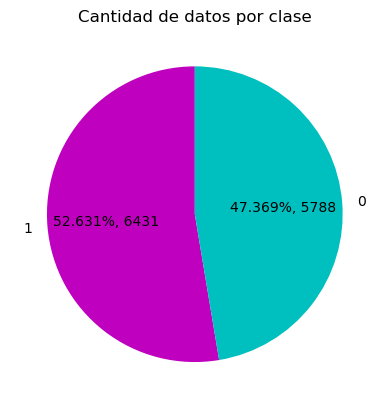

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#csv to dataframe
df = pd.read_csv('desafio1.csv')
df = pd.DataFrame(df)
#1.1
#Estadistica descriptiva por columna 
print(df.describe())
print('-----------------------------------------------------------------------------')
print('Grafico de tortas')
#Grafico de tortas
classtype = ['1','0']
values = df['class'].value_counts()
xplot = np.array(values)
#print(values)
colors = ['m','c' ]
plt.pie(xplot,labels = classtype,autopct=lambda p:f'{p:.3f}%, {p*sum(xplot)/100 :.0f}', colors = colors, startangle = 90)
plt.title('Cantidad de datos por clase')
#plt.legend()
plt.show()

1.2 Generar los conjuntos (X, y) y realizar un muestreo aleatorio simple y estratificado, tomando el 30% de los datos para construir el conjunto de test. Con el 70% de datos restantes, construir el conjunto de entrenamiento. Mostrar en graficos de tortas las distribuciones de los datos en las clases
de los conjuntos de test y de entrenamiento.

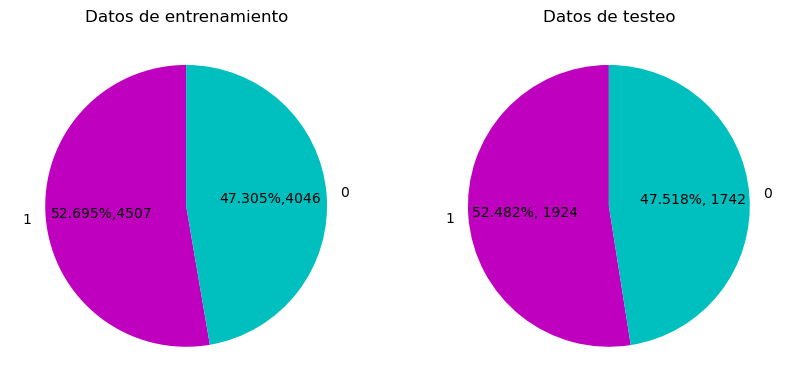

In [17]:
#1.2
#print(df.shape[1])
X = df.iloc[:,0:16]
y = df.iloc[:,16]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

#plots
train_values = y_train.value_counts()
#print(train_values)
test_values = y_test.value_counts()
#print(test_values)
train = np.array(train_values)
test = np.array(test_values)
#fig.suptitle('1.2 Datos generados')

#fig = plt.subplots()
plt.figure(figsize = (10,8))
plt.subplot(1,2,1)
plt.pie(train,labels = classtype,
        autopct=lambda p:f'{p:.3f}%,{p*sum(train)/100 :.0f}',
        colors = colors,
        startangle = 90)
plt.title('Datos de entrenamiento')

plt.subplot(1,2,2)
plt.pie(test,labels = classtype,
        autopct=lambda p:f'{p:.3f}%, {p*sum(test)/100 :.0f}',
        colors = colors,
        startangle = 90)
plt.title('Datos de testeo')
plt.show()

## Pregunta 2
Utilizar los tres algoritmos de clasificacion asignados y responder a los siguientes items.

2.1 Con el conjunto de entrenamiento generado en la pregunta anterior, obtener tres modelos de clasificacion usando los algoritmos asignados. Describir los hiperparametros utilizados. Recuerde estandarizar los datos en el caso que sea necesario.

In [18]:
#2.1
#Estardarizacion de los valores entrenados y testeados
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
#Estardarizacion
X_train_std = scaler.transform(X_train)
#print(len(X_train_std_svm))
X_test_std = scaler.transform(X_test)
#print(len(X_test_std_svm))

#SVM Kernel No Lineal
from sklearn.svm import SVC

#Clasificación de vectores de soporte C
#Parámetro de regularización C=1
#Modificar c para mejorar limites de separacion
svm = SVC(kernel = 'rbf', random_state=20, gamma='scale', C=5.0)
'''Hiper parametros:
    Kernel: Tipo de kernel, en caso de no linealidad se utiliza 'rbf' (funcion de base radial).
    Gamma: Es el inverso del radio de influencia y define si un parametro esta 'lejos' o 'cerca',
    confroma el 'area' de clasificacion.
    C: Define el margen de clasificacion de los valores. 
    Mayor c implica una disminucion del margen de separacion entre los valores de cada clase'''

svm.fit(X_train_std, y_train)

#Árboles de Decisión
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini', max_depth=25, random_state=20)
'''Hiper parametros:
    Criterion: Mide la calidad de una division. los criterios pueden ser, 'gini' de Gini impurity
    y 'entropy' este ultimo por la entropia de Shannon.
    Max_depth: Niveles o generaciones del arbor de deciciones. 
    Para esta situacion pasada la generacion 25 el modelo cae en overfitting'''
    
tree.fit(X_train_std, y_train)

#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski', n_jobs=-1)
'''Hiper parametros:
    n_neighbors: numero de vecinos.
    p: Parámetro de potencia para la métrica de Minkowski.
    Cuando p = 1, esto es equivalente a usar manhattan_distance y
    euclidean_distance para p = 2.
    metric: Define la metrica (indicadas anteriormente) a utilizar. 
    n_jobs: Numero de trabajos paralelos que se ejecutaran para la busqueda de vecinos.'''
knn.fit(X_train_std, y_train)

KNeighborsClassifier(n_jobs=-1)

2.2 Utilizar los modelos obtenidos en el item anterior para predecir la clasificacion de los datos incluidos en el conjunto de test. Generar un nuevo DataFrame con los datos del conjunto test, incluyendo la clasificacion real y la clasificacion predicha por los modelos.

In [19]:
#Prediccion
y_svm = svm.predict(X_test_std)
y_tree = tree.predict(X_test_std)
y_knn = knn.predict(X_test_std)

#Dataframe
df_test = pd.DataFrame(X_test)
df_test['y_test'] = y_test
df_test['y_svm'] = y_svm
df_test['y_tree'] = y_tree
df_test['y_knn'] = y_knn
df_test

c:\Users\Javiera Carrasco\anaconda3\envs\ima539\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col2.1,col13,col14,col15,col16,y_test,y_svm,y_tree,y_knn
12076,-1000.983686,-55.241728,-33.778530,35.557631,1.041022,-16.826054,0.814280,25.654390,22.962661,16.710576,-12.695288,8.364215,8.818131,19.474218,-1.220063,1.783751,1,1,1,1
7027,1960.499953,-55.458830,-35.729213,3.974991,2.084105,12.779424,-18.559552,20.474839,13.433918,6.045187,-2.123048,-7.765337,-4.734997,-1.454621,5.643566,-2.296529,0,0,0,0
417,2723.454696,105.464551,-35.311443,-32.338372,-4.881714,10.093028,-5.548514,-3.909042,10.304706,0.031384,-5.686967,12.101898,-8.598668,17.776298,11.595568,5.731345,0,0,0,0
752,-1528.005808,42.902123,21.039894,6.188217,5.983290,-11.408883,12.631943,-3.859282,7.787955,-15.830523,6.441645,6.496886,0.779065,2.340837,-2.003299,2.442281,1,1,1,1
11202,-1441.496296,-54.727944,-29.846973,-1.025726,10.387158,20.345408,-23.798764,22.994471,14.046559,5.686715,-2.012198,-7.239743,-3.639601,-0.216357,3.289474,-0.963940,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9157,3097.996949,37.775220,14.462580,3.414694,19.196828,-0.707808,-1.580545,-0.651803,0.414035,-14.261915,-20.555067,-2.904679,-1.457286,6.693337,1.573809,3.352361,1,1,1,1
7529,2361.494235,-57.279006,-42.798385,12.968084,-10.035822,-0.989292,-4.853926,6.229930,2.885403,0.994556,0.038041,-0.973399,-0.086026,-0.035151,-0.203557,0.178753,0,0,0,0
8053,1921.518302,-37.786041,8.676240,-25.546523,19.253855,-5.739708,23.015851,-8.055257,7.466354,7.782098,-5.254875,-4.939231,2.431603,2.715598,0.088545,-1.920551,0,0,0,0
7555,1670.504789,-53.298894,-28.661652,-3.449891,13.119471,22.014395,-19.941083,12.397277,1.619963,-1.188173,1.102105,3.158668,3.478385,2.514008,-5.102910,2.693395,0,0,0,0


2.3 Finalmente, mostrar el total de datos bien clasificados y el total de datos mal clasificados por los modelos y mostrar los graficos de tortas con las distribuciones predichas por estos, utilizando en este item solo los datos
del conjunto test.

In [20]:
#Aciertos de cada modelo
cont_svm = 0
cont_tree = 0
cont_knn = 0
cont = 0

for i in df_test['y_test']:
    if i==df_test.iloc[cont,-1]:
        cont_svm+=1
    if i==df_test.iloc[cont,-2]:
        cont_tree+=1
    if i==df_test.iloc[cont,-3]:
            cont_knn+=1
    cont+=1

print('El modelo SVM Kernel no lineal tiene '+str(cont_svm)+' aciertos representando un '+str((cont_svm/len(df_test['y_test']))*100)+'% del conjunto de testeo')
print('El modelo Arbol de Decision tiene '+str(cont_tree)+' aciertos representando un '+str((cont_tree/len(df_test['y_test']))*100)+'% del conjunto de testeo')
print('El modelo KNN tiene '+str(cont_knn)+' aciertos representando un '+str((cont_knn/len(df_test['y_test']))*100)+'% del conjunto de testeo')

El modelo SVM Kernel no lineal tiene 3647 aciertos representando un 99.48172394980905% del conjunto de testeo
El modelo Arbol de Decision tiene 3527 aciertos representando un 96.20840152755046% del conjunto de testeo
El modelo KNN tiene 3655 aciertos representando un 99.6999454446263% del conjunto de testeo


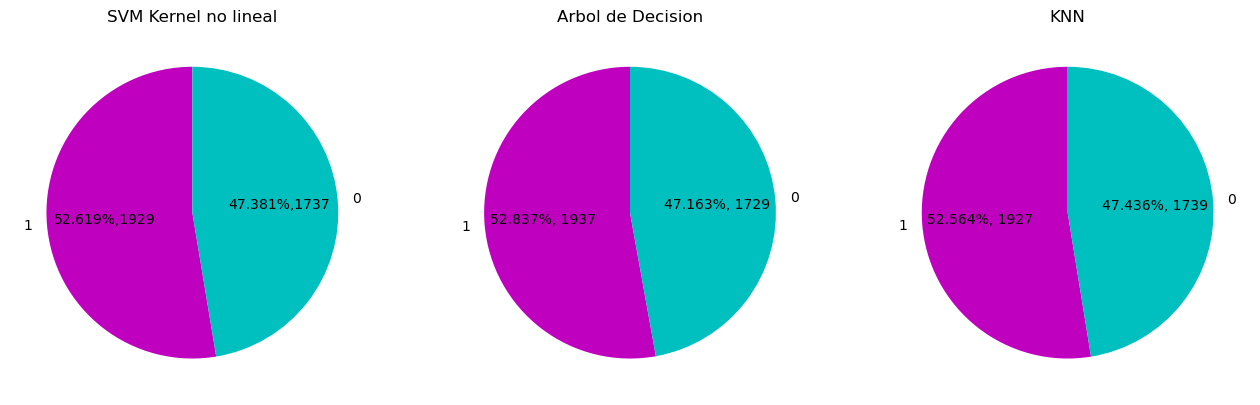

In [21]:
#Graficos
#fig = plt.subplots()
plt.figure(figsize = (16,14))

val_svm = np.array(df_test['y_svm'].value_counts())
#print(val_svm)
val_tree = np.array(df_test['y_tree'].value_counts())
#print(val_tree)
val_knn = np.array(df_test['y_knn'].value_counts())
#print(val_knn)

plt.subplot(1,3,1)
plt.pie(val_svm, labels = classtype,
        autopct=lambda p:f'{p:.3f}%,{p*sum(val_svm)/100 :.0f}',
        colors = colors,
        startangle = 90)
plt.title('SVM Kernel no lineal')

plt.subplot(1,3,2)
plt.pie(val_tree,labels = classtype,
        autopct=lambda p:f'{p:.3f}%, {p*sum(val_tree)/100 :.0f}',
        colors = colors,
        startangle = 90)
plt.title('Arbol de Decision')

plt.subplot(1,3,3)
plt.pie(val_knn,labels = classtype,
        autopct=lambda p:f'{p:.3f}%, {p*sum(val_knn)/100 :.0f}',
        colors = colors,
        startangle = 90)
plt.title('KNN')
plt.show()

## Pregunta 3

Utilice la semilla asignada y el codigo del bloque siguiente para extraer dos caracteristicas de la base de datos y generar una nueva base de datos (X2, y).

In [22]:
import os
import pandas as pd

mi_semilla_asignada = 20
df = pd.read_csv(os.path.join(os.getcwd(), 'desafio1.csv'))

auxY, auxX = df['class'], df.drop('class', axis= 'columns')
auxX = auxX.sample(n= 2, axis= 'columns', random_state= mi_semilla_asignada)
auxX.columns = [i for i in range(auxX.shape[1])]

X = pd.concat([auxX[auxY == 0][:100], auxX[auxY != 0][:100]])
X.reset_index(inplace= True, drop= True)
y = pd.Series([0] * 100 + [1] * 100)
X2 = X.sample(frac= 1, random_state= mi_semilla_asignada)
y = y.sample(frac= 1, random_state= mi_semilla_asignada)

Utilizar el algoritmo AdalineSGD implementado en clases para ajustar un modelo en el conjunto de datos (X2, y). Mostrar los umbrales de decision para la primera epoca de entrenamiento, alguna epoca intermedia y el umbral de
decision del modelo final. Adicionalmente, mostrar el comportamiento de la perdida en funcion de las epocas de entrenamiento. ¿Que puede concluir?

In [23]:
#Descenso de Gradiente Estocástico (SGD)
class AdalineSGD(object):
    
    def __init__(self, eta=0.01, n_iter=15, shuffle=True, random_state=20):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self, X, y):
        """Ajustar los datos de entrenamiento sin reiniciar los pesos"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self
    
    def _shuffle(self, X, y):
        """Barajar datos de entrenamiento"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Inicializar pesos con pequeños números aleatorios"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Aplicar la regla de aprendizaje de Adaline para actualizar los pesos"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """Calcular entrana neta, z"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """Calcular activación lineal"""
        return X
    
    def predict(self, X):
        """Etiqueta de clase después del paso unitario"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [24]:
#funcion plot_decision_regions
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        if cl == 0:
            label = '0'
        else:
            label = '1'
            
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=label,edgecolor='black')

C:\Users\Javiera Carrasco\AppData\Local\Temp\ipykernel_27628\4211561356.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
C:\Users\Javiera Carrasco\AppData\Local\Temp\ipykernel_27628\4211561356.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
C:\Users\Javiera Carrasco\AppData\Local\Temp\ipykernel_27628\4211561356.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


"CONCLUSION: En general este modelo lineal no presenta un buen comportamiento, esto puede explicarse \n    debido a que el conjunto de datos es mayor al que este modelo pueda manejar correctamente, un reflejo \n    de ello es la rapida 'convergencia' seguido de una ligera pero perseptible oscilacion de los valores."

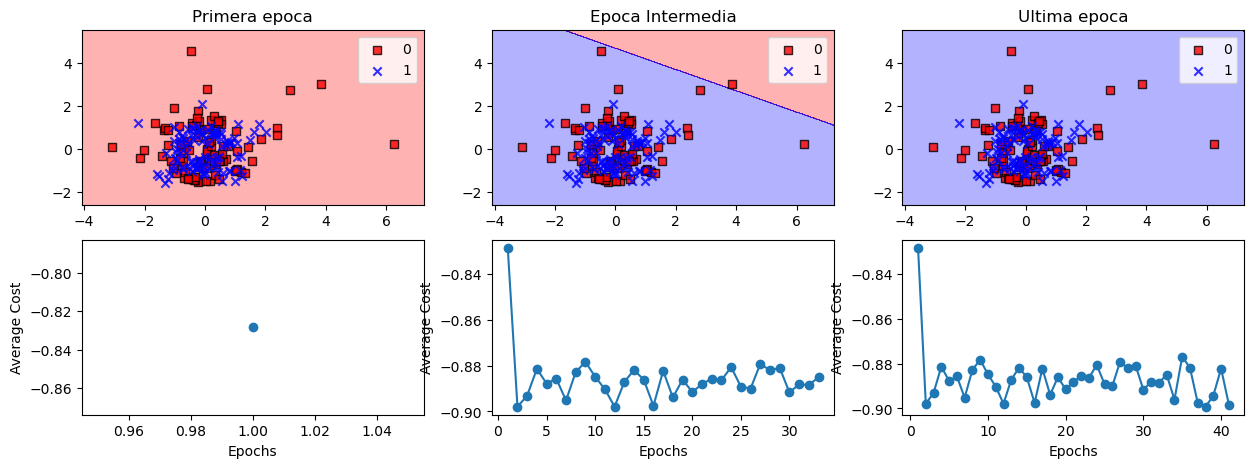

In [25]:
#Estardarizacion
scaler = StandardScaler()
scaler.fit(X2)
X2_std = scaler.transform(X2)

#Ploteo
plt.figure(figsize = (15,5))

"""El valor de eta fue elegido de modo que el modelo converja.
    El ideal es encontrar la conbinacion optima ente el numero de iteraciones y el valor de etade modo
    que se maximice el rendimiento del modelo para este conjunto."""

#Primera epoca
ada_first = AdalineSGD(n_iter=1, eta=0.02, random_state=20)
ada_first.fit(X2_std, y)
plt.subplot(2,3,1)
plot_decision_regions(X2_std, y, classifier= ada_first)
plt.title('Primera epoca')
plt.legend()

plt.subplot(2,3,4)
plt.plot(range(1, len(ada_first.cost_) + 1), np.log10(ada_first.cost_), marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

"""Con una sola iteracion no se puede observar el umbral de decision."""

#Epoca intermedia
ada_inter = AdalineSGD(n_iter=33, eta=0.02, random_state=20)
ada_inter.fit(X2_std, y)
plt.subplot(2,3,2)
plot_decision_regions(X2_std, y, classifier= ada_inter)
plt.title('Epoca Intermedia')
plt.legend()

plt.subplot(2,3,5)
plt.plot(range(1, len(ada_inter.cost_) + 1), np.log10(ada_inter.cost_), marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

"""33 Con los parametros (n_iter=172, eta=0.02), se puede observar el umbral de decision."""

#Ultima epoca
ada_last = AdalineSGD(n_iter=41, eta=0.02, random_state=20)
ada_last.fit(X2_std, y)
plt.subplot(2,3,3)
plot_decision_regions(X2_std, y, classifier= ada_last)
plt.title('Ultima epoca')
plt.legend()

plt.subplot(2,3,6)
plt.plot(range(1, len(ada_last.cost_) + 1), np.log10(ada_last.cost_), marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

"""CONCLUSION: En general este modelo lineal no presenta un buen comportamiento, esto puede explicarse 
    debido a que el conjunto de datos es mayor al que este modelo pueda manejar correctamente, un reflejo 
    de ello es la rapida 'convergencia' seguido de una ligera pero perseptible oscilacion de los valores."""